In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import date

# The plot module for graphs
import matplotlib.pyplot as plt
%matplotlib inline

# The statistical module for statistical analysis
import scipy.stats as stats
from scipy.stats import linregress
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
weather_data_to_load = "clean_weather_1-1-2016_to_8-31-2020.csv"
crime_data_to_load = "crime_cleaned.csv"

# Read School and Student Data File and store into Pandas DataFrames
weather_data = pd.read_csv(weather_data_to_load)
crime_data = pd.read_csv(crime_data_to_load,usecols = ['Occurrence_date','OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID','INCIDENT_ID'])
crime_data_for_pivot = pd.read_csv(crime_data_to_load,usecols = ['Occurrence_date','OFFENSE_TYPE_ID','INCIDENT_ID'])

In [3]:
weather_data['weather_date'] = pd.to_datetime(weather_data['Date'])
print(len(weather_data))
weather_data.info()

1705
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1705 non-null   int64         
 1   Date                 1705 non-null   object        
 2   Avg temperature (F)  1705 non-null   int64         
 3   Precip Inches        1705 non-null   float64       
 4   Cloud Cover          1705 non-null   float64       
 5   Wind Speed(Miles)    1705 non-null   float64       
 6   weather_date         1705 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 93.4+ KB


In [4]:
crime_data['crime_date'] = pd.to_datetime(crime_data['Occurrence_date'])

crime_data_type_only = crime_data.groupby(['crime_date', 'OFFENSE_CATEGORY_ID']).nunique()
crime_data_type_only.drop(['crime_date', 'OFFENSE_CATEGORY_ID','OFFENSE_TYPE_ID'], axis=1, inplace=True)
crime_data_type_only.reset_index()

,crime_date,OFFENSE_CATEGORY_ID,Occurrence_date,INCIDENT_ID
0,2015-01-02,aggravated-assault,1,2
1,2015-01-02,all-other-crimes,1,4
2,2015-01-02,auto-theft,1,2
3,2015-01-02,burglary,1,3
4,2015-01-02,drug-alcohol,1,3
...,...,...,...,...
26304,2020-12-07,burglary,1,1
26305,2020-12-07,drug-alcohol,1,1
26306,2020-12-07,other-crimes-against-persons,1,1
26307,2020-12-07,public-disorder,1,1


In [5]:
crime_data_pivot = crime_data_type_only.pivot_table(index='crime_date', columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID')
crime_data_pivot = crime_data_pivot.fillna(0)
crime_data_pivot["total_offenses"] = crime_data_pivot.iloc[:,:].sum(axis=1)
crime_data_pivot.info()
crime_data_pivot.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2015-01-02 to 2020-12-07
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   aggravated-assault            2167 non-null   float64
 1   all-other-crimes              2167 non-null   float64
 2   arson                         2167 non-null   float64
 3   auto-theft                    2167 non-null   float64
 4   burglary                      2167 non-null   float64
 5   drug-alcohol                  2167 non-null   float64
 6   larceny                       2167 non-null   float64
 7   murder                        2167 non-null   float64
 8   other-crimes-against-persons  2167 non-null   float64
 9   public-disorder               2167 non-null   float64
 10  robbery                       2167 non-null   float64
 11  sexual-assault                2167 non-null   float64
 12  theft-from-motor-vehicle      2167 non-null 

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,total_offenses
crime_date,,,,,,,,,,,,,,,
2015-01-02,2.0,4.0,0.0,2.0,3.0,3.0,5.0,0.0,2.0,4.0,2.0,0.0,2.0,1.0,30.0
2015-01-03,3.0,5.0,0.0,1.0,3.0,2.0,4.0,0.0,2.0,3.0,1.0,1.0,2.0,1.0,28.0
2015-01-04,1.0,5.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,25.0
2015-01-05,3.0,6.0,0.0,1.0,4.0,3.0,3.0,0.0,2.0,3.0,1.0,1.0,2.0,2.0,31.0
2015-01-06,2.0,5.0,0.0,1.0,3.0,3.0,3.0,0.0,2.0,4.0,2.0,1.0,2.0,3.0,31.0


In [6]:
# Combine the data into a single dataset.  
#inner merge intentionally drops days that do not match in both data sets to avoid NaN records
criminal_weather_merged = pd.merge(crime_data_pivot, weather_data, left_on = 'crime_date',right_on = 'weather_date')
criminal_weather_merged = criminal_weather_merged[['Date','total_offenses','aggravated-assault', \
                                                             'all-other-crimes','arson', 'auto-theft','burglary',\
                                                             'murder','other-crimes-against-persons', 'public-disorder',\
                                                             'robbery','sexual-assault', 'theft-from-motor-vehicle',\
                                                             'white-collar-crime','Avg temperature (F)','Precip Inches',\
                                                             'Cloud Cover', 'Wind Speed(Miles)',]]

criminal_weather_merged["Date"] = pd.to_datetime(criminal_weather_merged["Date"], format='%Y-%m-%d')
criminal_weather_merged = criminal_weather_merged.set_index('Date')

criminal_weather_merged["Year"]=criminal_weather_merged.index.year
criminal_weather_merged["Month"]=criminal_weather_merged.index.month
#print(criminal_weather_merged['Date'].min())
#print(criminal_weather_merged['Date'].max())
criminal_weather_merged

,total_offenses,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),Year,Month
Date,,,,,,,,,,,,,,,,,,,
2016-01-01,38.0,3.0,7.0,0.0,2.0,3.0,1.0,3.0,4.0,1.0,2.0,2.0,3.0,11,0.0,2.000,3.375,2016,1
2016-01-02,29.0,1.0,5.0,0.0,1.0,4.0,0.0,2.0,5.0,2.0,0.0,2.0,0.0,20,0.0,10.875,4.500,2016,1
2016-01-03,33.0,3.0,7.0,0.0,1.0,3.0,0.0,3.0,5.0,2.0,2.0,2.0,0.0,24,0.0,10.750,3.500,2016,1
2016-01-04,29.0,1.0,6.0,0.0,1.0,3.0,0.0,1.0,5.0,1.0,1.0,2.0,1.0,22,0.0,56.250,5.750,2016,1
2016-01-05,33.0,2.0,6.0,0.0,1.0,4.0,0.0,3.0,3.0,2.0,0.0,2.0,1.0,28,0.0,19.750,3.250,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,30.0,1.0,5.0,0.0,1.0,5.0,0.0,2.0,4.0,1.0,1.0,2.0,1.0,85,0.0,34.750,5.750,2020,8
2020-08-28,31.0,3.0,5.0,0.0,2.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,2.0,72,0.1,48.250,6.875,2020,8
2020-08-29,35.0,3.0,4.0,1.0,1.0,3.0,0.0,3.0,5.0,2.0,3.0,2.0,2.0,75,0.0,26.875,4.875,2020,8


In [7]:
summary_stats=criminal_weather_merged[["Avg temperature (F)","Precip Inches","Cloud Cover","Wind Speed(Miles)","total_offenses"]].describe()
summary_stats

,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),total_offenses
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,51.965982,0.003754,23.846628,5.598387,32.500293
std,18.342881,0.021613,20.858988,1.817526,3.163785
min,-4.000000,0.000000,0.000000,1.375000,22.000000
25%,38.000000,0.000000,8.125000,4.375000,30.000000
50%,51.000000,0.000000,17.500000,5.375000,33.000000
75%,68.000000,0.000000,34.250000,6.375000,35.000000
max,92.000000,0.300000,100.000000,17.250000,42.000000


In [8]:
def linear(x_axis,y_axis,x_label,y_label,title,eq_position,output):

    plt.scatter(x_axis,y_axis,color="b",edgecolors="k",alpha=1)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.title(title,fontsize=15)
    plt.tight_layout()
    correlation=stats.pearsonr(x_axis,y_axis)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r")
    plt.annotate(line_eq,eq_position,fontsize=15,color='r')
    print(f"The r^2-value is: {round(rvalue**2,3)}")
    print(f"The p-value is: {pvalue}")
    plt.savefig(f'graphs/Scatter_{output}.png')
    plt.show()
    return

The correlation between both factors is 0.3
The r^2-value is: 0.087
The p-value is: 9.367593299520368e-36


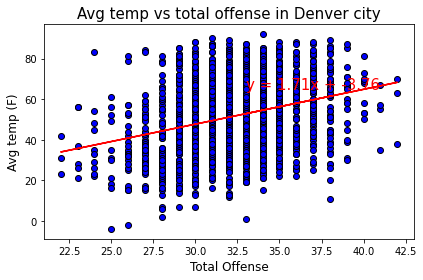

In [9]:
linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Avg temperature (F)"],"Total Offense","Avg temp (F)","Avg temp vs total offense in Denver city",(33,65),'offense_vs_temp')

The correlation between both factors is -0.09
The r^2-value is: 0.008
The p-value is: 0.0002949997675594989


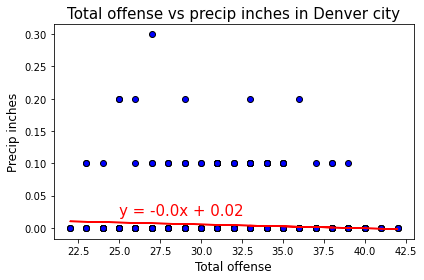

In [10]:
linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Precip Inches"],"Total offense","Precip inches","Total offense vs precip inches in Denver city",(25,.02),'offense_vs_percip')

The correlation between both factors is -0.19
The r^2-value is: 0.034
The p-value is: 1.3614326295681198e-14


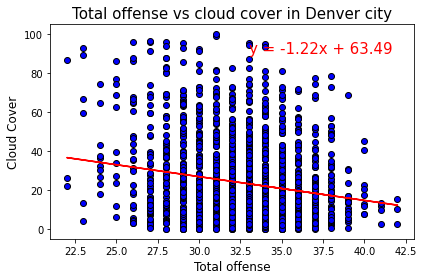

In [11]:
linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Cloud Cover"],"Total offense","Cloud Cover","Total offense vs cloud cover in Denver city",(33,90),'offense_vs_cloudcover')

The correlation between both factors is -0.0
The r^2-value is: 0.0
The p-value is: 0.962889188958643


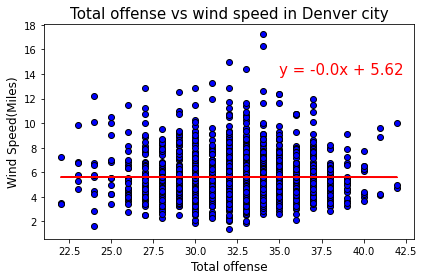

In [12]:

linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Wind Speed(Miles)"],"Total offense","Wind Speed(Miles)","Total offense vs wind speed in Denver city",(35,14),'offense_vs_windspeed')

<Figure size 720x720 with 0 Axes>

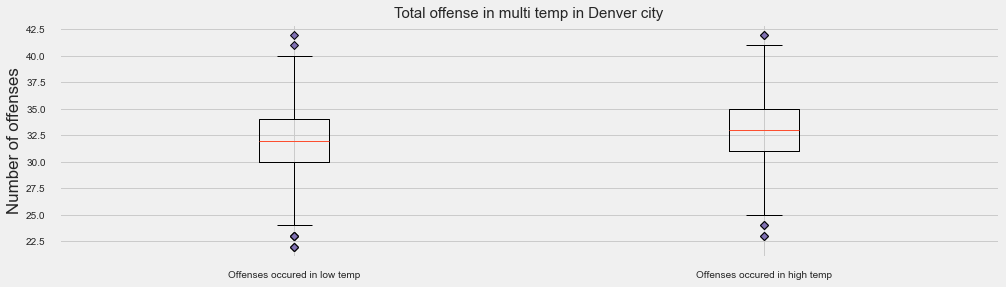

In [26]:
mean_temp = criminal_weather_merged['Avg temperature (F)'].mean()
mean_temp

cold_weather=criminal_weather_merged[criminal_weather_merged["Avg temperature (F)"] <=mean_temp]

cold_weather

hot_weather=criminal_weather_merged[criminal_weather_merged["Avg temperature (F)"] >mean_temp] #.reset_index().drop(["index"],axis=1)
hot_weather

plt.figure(figsize=(10,10))
mov_diamond = dict(markerfacecolor='m', marker='D')

list_of_offense_temp=[cold_weather["total_offenses"],hot_weather["total_offenses"]]
labels=["Offenses occured in low temp","Offenses occured in high temp"]
fig, ax = plt.subplots()
plt.tick_params(labelsize=10, width=2, length=10,color="r")
plt.ylabel("Number of offenses")
plt.title("Total offense in multi temp in Denver city",fontsize=15)
plt.boxplot(list_of_offense_temp,labels=labels,flierprops=mov_diamond)
plt.savefig('graphs/boxplot_mean_temp.png')
plt.show()

In [14]:
quartiles = cold_weather["total_offenses"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile for offenses occured in low temp is: {lowerq}")
print(f"The upper quartile for offenses occured in low temp is: {upperq}")
print(f"The the median for offenses occured in low temp is: {quartiles[0.5]}")

#Determine outliers using upper and lower bounds
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)   
print(f"The interquartile range for offenses occured in low temp is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = hot_weather["total_offenses"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile for offenses occured in high temp is: {lowerq}")
print(f"The upper quartile for offenses occured in high temp is: {upperq}")
print(f"The the median for offenses occured in low high is: {quartiles[0.5]}")

#Determine outliers using upper and lower bounds
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)   
print(f"The interquartile range for offenses occured in high temp is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for offenses occured in low temp is: 30.0
The upper quartile for offenses occured in low temp is: 34.0
The the median for offenses occured in low temp is: 32.0
The interquartile range for offenses occured in low temp is: 4.0
Values below 24.0 could be outliers.
Values above 40.0 could be outliers.
The lower quartile for offenses occured in high temp is: 31.0
The upper quartile for offenses occured in high temp is: 35.0
The the median for offenses occured in low high is: 33.0
The interquartile range for offenses occured in high temp is: 4.0
Values below 25.0 could be outliers.
Values above 41.0 could be outliers.


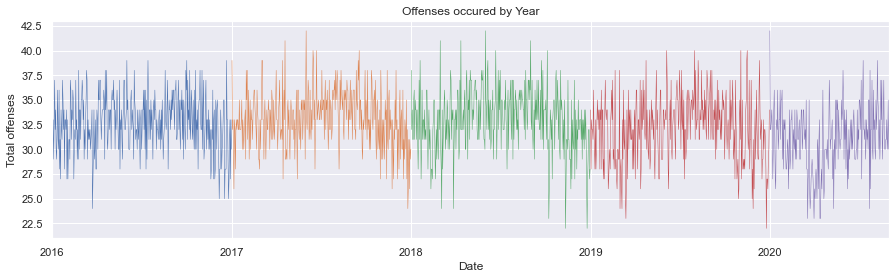

In [15]:
sns.set(rc={'figure.figsize':(15, 4)})

ax = criminal_weather_merged.loc["2016", "total_offenses"].plot(linewidth=0.5);
criminal_weather_merged.loc["2017", "total_offenses"].plot(linewidth=0.5);
criminal_weather_merged.loc["2018", "total_offenses"].plot(linewidth=0.5);
criminal_weather_merged.loc["2019", "total_offenses"].plot(linewidth=0.5);
criminal_weather_merged.loc["2020", "total_offenses"].plot(linewidth=0.5);
ax.set_ylabel("Total offenses")
ax.set_title("Offenses occured by Year")
plt.savefig('graphs/line_year_by_color.png')

The 5 year average temp = 51.97


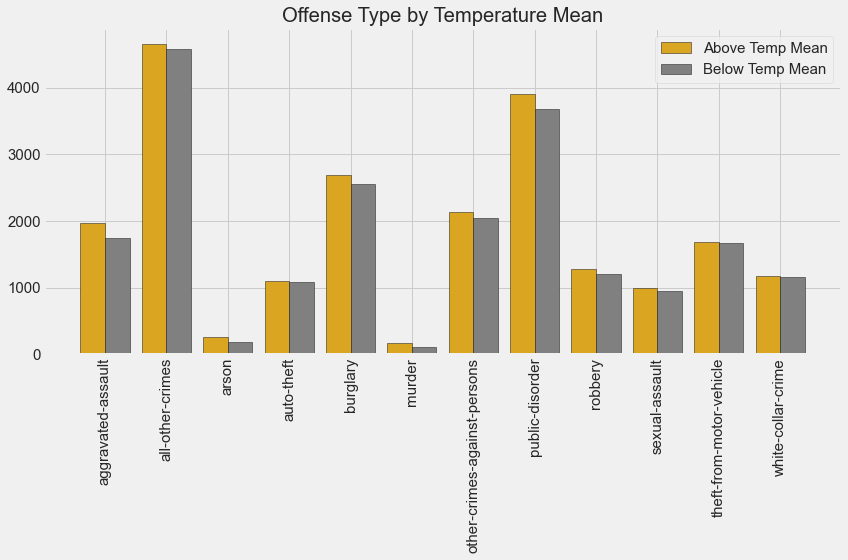

In [16]:
#create dataframes for above and below mean
temp_above_mean = criminal_weather_merged[criminal_weather_merged['Avg temperature (F)'] >mean_temp]
temp_below_mean = criminal_weather_merged[criminal_weather_merged['Avg temperature (F)'] <mean_temp]
#grab the column names for easier graphing later
column_names = ['aggravated-assault','all-other-crimes','arson', 'auto-theft','burglary',\
            'murder','other-crimes-against-persons', 'public-disorder',\
            'robbery','sexual-assault', 'theft-from-motor-vehicle',\
            'white-collar-crime']
#sum each offense in the new dataframes by columns
above_mean_sum = temp_above_mean.loc[:,column_names].sum(axis=0)
below_mean_sum = temp_below_mean.loc[:,column_names].sum(axis=0)
#create the chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
locs, labels = plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.setp(labels, rotation=90)
plt.title('Offense Type by Temperature Mean')
plt.bar(column_names, above_mean_sum, alpha=1, align='edge', width=-.4, ec='k', color='goldenrod')
plt.bar(column_names, below_mean_sum, alpha=1, align='edge', width=.4, ec='k', color='grey')
plt.legend(['Above Temp Mean', 'Below Temp Mean'], prop={'size': 15})
print(f"The 5 year average temp = {round(mean_temp,2)}")
plt.tight_layout();

plt.savefig('graphs/Bar_Temp_Mean.png')

In [17]:
weather_data["Date"]=pd.to_datetime(weather_data["Date"])
crime_data["Occurrence_date"]=pd.to_datetime(crime_data["Occurrence_date"])
crime_data=crime_data.rename(columns={"Occurrence_date":"Date"})
crime_weather_merge=pd.merge(weather_data,crime_data,on="Date",how="left")
crime_weather_merge["Date"]=pd.to_datetime(crime_weather_merge["Date"])
crime_weather_merge.head()

,Unnamed: 0,Date,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),weather_date,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ID,crime_date
0,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,aggravated-assault,aggravated-assault,10,2016-01-01
1,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,aggravated-assault-dv,aggravated-assault,2,2016-01-01
2,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,assault-dv,other-crimes-against-persons,7,2016-01-01
3,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,assault-police-simple,other-crimes-against-persons,2,2016-01-01
4,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,assault-simple,other-crimes-against-persons,5,2016-01-01


In [18]:
bins=[0,20,40,60,80,100]
label_group=["0<20","20-40","40-60","60-80","80-100"]
crime_weather_merge["Temp range"]=pd.cut(crime_weather_merge["Avg temperature (F)"],bins,labels=label_group,include_lowest=True)
crime_weather_merge.head()

,Unnamed: 0,Date,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),weather_date,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ID,crime_date,Temp range
0,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,aggravated-assault,aggravated-assault,10,2016-01-01,0<20
1,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,aggravated-assault-dv,aggravated-assault,2,2016-01-01,0<20
2,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,assault-dv,other-crimes-against-persons,7,2016-01-01,0<20
3,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,assault-police-simple,other-crimes-against-persons,2,2016-01-01,0<20
4,0,2016-01-01,11,0.0,2.0,3.375,2016-01-01,assault-simple,other-crimes-against-persons,5,2016-01-01,0<20


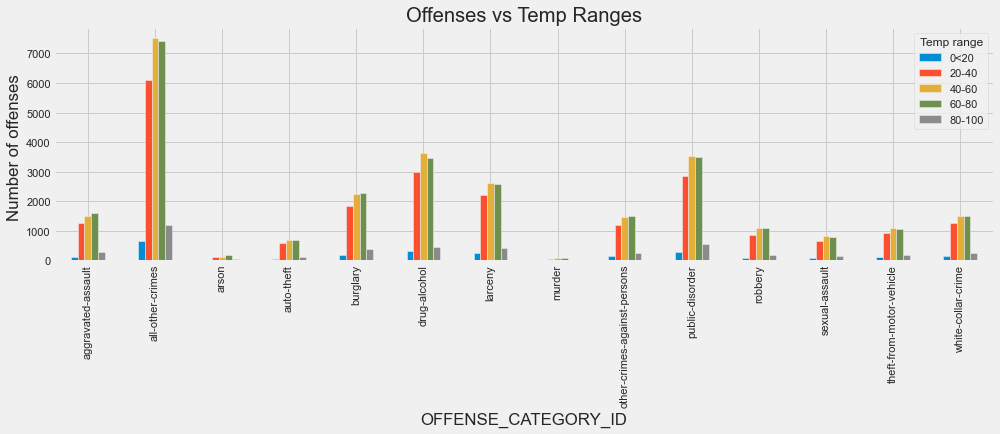

In [19]:
crime_weather_pivot=crime_weather_merge.pivot_table(index="Temp range", columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID', aggfunc='count')
# crime_weather_pivot["Total offenses"] = crime_weather_pivot.iloc[:,:].sum(axis=1)
# crime_weather_pivot["Average offenses"] = crime_weather_pivot.iloc[:,:].mean(axis=1)

ax = crime_weather_pivot.T.plot(kind='bar')
ylab = ax.set_ylabel('Number of offenses ')
ax.plot(figsize=(20,10))
plt.title("Offenses vs Temp Ranges")
plt.savefig('graphs/Bar_Temp_range.png')

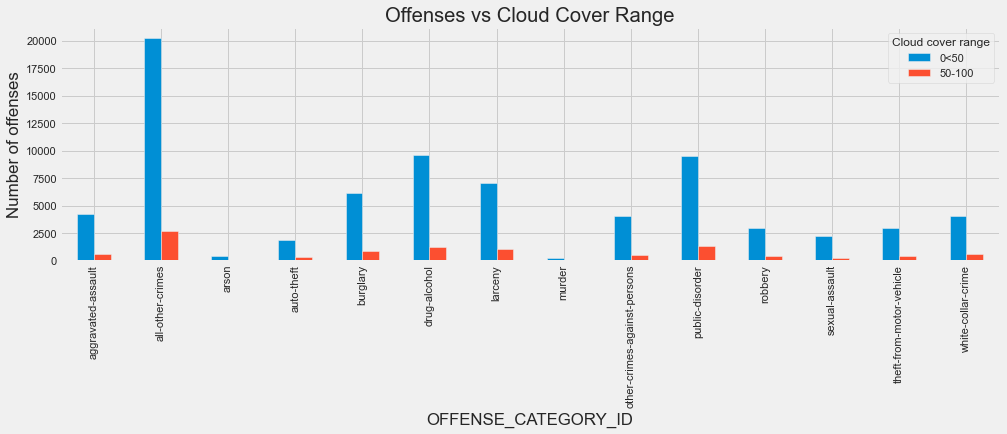

In [21]:
bins=[0,50,100]
label_group=["0<50","50-100"]
crime_weather_merge["Cloud cover range"]=pd.cut(crime_weather_merge["Cloud Cover"],bins,labels=label_group,include_lowest=True)
crime_cloud_pivot=crime_weather_merge.pivot_table(index="Cloud cover range", columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID', aggfunc='count')

crime_weather_merge.head()
ax = crime_cloud_pivot.T.plot(kind='bar')
ylab = ax.set_ylabel('Number of offenses')
ax.plot(figsize=(20,10))
plt.title("Offenses vs Cloud Cover Range")
plt.savefig('graphs/Bar_Cloud_cover_range.png')

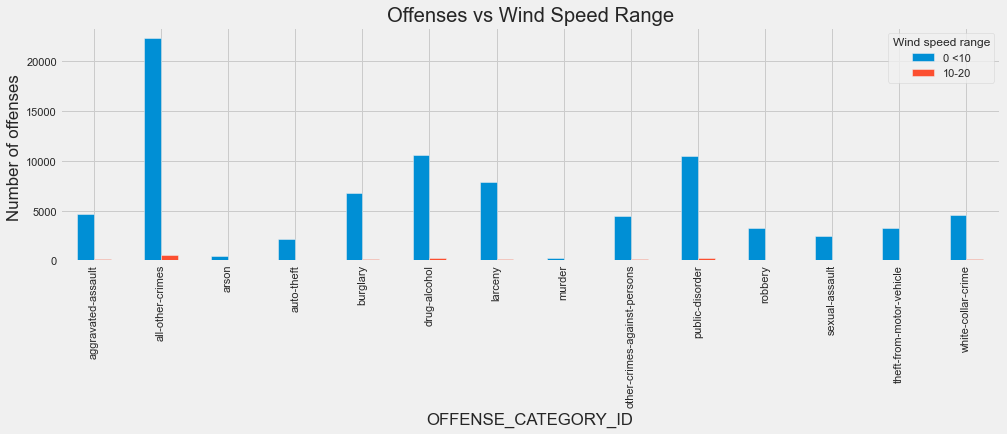

In [23]:
bins=[0,10,20]
label_group=["0 <10","10-20"]
crime_weather_merge["Wind speed range"]=pd.cut(crime_weather_merge["Wind Speed(Miles)"],bins,labels=label_group,include_lowest=True)
crime_wind_speed_pivot=crime_weather_merge.pivot_table(index="Wind speed range", columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID', aggfunc='count')

ax = crime_wind_speed_pivot.T.plot(kind='bar')
ylab = ax.set_ylabel('Number of offenses ')
ax.plot(figsize=(20,10))
plt.title("Offenses vs Wind Speed Range")
plt.savefig('graphs/Bar_Wind_speed_range.png')

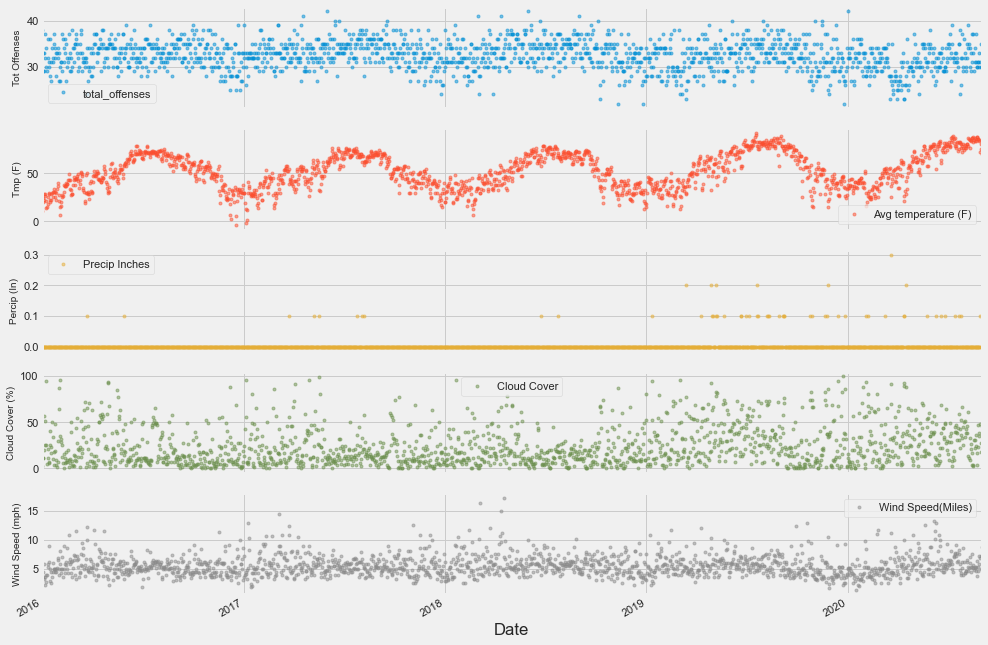

In [24]:
cols_plot = ['total_offenses', 'Avg temperature (F)','Precip Inches','Cloud Cover', 'Wind Speed(Miles)']
axes = criminal_weather_merged[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 12), subplots=True)
axes[0].set_ylabel('Tot Offenses',fontsize=10)
axes[1].set_ylabel('Tmp (F)',fontsize=10)
axes[2].set_ylabel('Percip (In)',fontsize=10)
axes[3].set_ylabel('Cloud Cover (%)',fontsize=10)
axes[4].set_ylabel('Wind Speed (mph)',fontsize=10)
        
plt.savefig('graphs/Scatter_Over_Time.png')

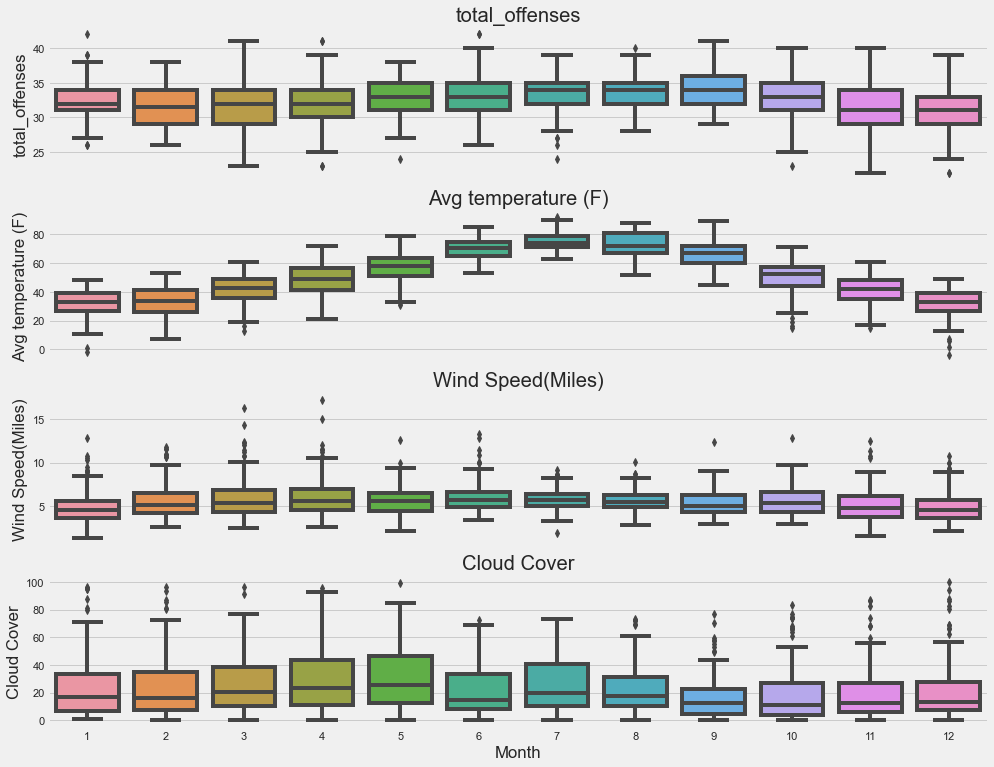

In [25]:
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
for name, ax in zip(['total_offenses', 'Avg temperature (F)', 'Wind Speed(Miles)','Cloud Cover'], axes):
    sns.boxplot(data=criminal_weather_merged, x='Month', y=name, ax=ax)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')
        
plt.savefig('graphs/boxplot_seasons.png')